# Workbook : EDA & Data Visualization

We'll continue working with the dataset from the Wrangling workbook here to answer the questions we set out to answer previously:

1. Who cheats more on their significant other - males or females?
2. Are cigarette smokers less likely to skydive?
3. Do people in New England gamble more than other parts of the country?

To do this, we'll explore the data and generate a number of visualizations. Note that we don't have `assert` statements when it comes to visualizations here. Instead, we have hidden test cells. Please do not modify the cells as they are necessary to reward points for your graphs!

**Import the following packages using their common shortened name found in parentheses:**

* `numpy` (`np`)
* `pandas` (`pd`)
* `matplotlib.pyplot` (`plt`)
* `seaborn` (`sns`)

In [1]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
assert np
assert pd
assert plt
assert sns

**Run the following cell code to make things throughout the rest of this workbook a little prettier.** (Note: You don't have to edit code here, but are free to and see what changes to be sure you understand each line.)

In [3]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set(context = 'talk', style='white')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('display.precision', 2)

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

I've included a cell of code that would have been written and run in the previous workbook. Here, we read the data in, wrangle it into the format we want, and clean it up a bit. See the previous workbook for more details. **Simply, run the code in this cell to get started working with these data in this workbook.**

In [4]:
# read in and clean up the data
survey = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv')
survey  = survey.iloc[1:,2:]
survey.columns = ['smoking','alcohol','gambling',
 'skydiving','speeding', 'cheated',
 'steak', 'steak_preference','gender',
 'age', 'income', 'education', 'region']
survey = survey.dropna(how='all')
survey.head()

,smoking,alcohol,gambling,skydiving,...,age,income,education,region
2,No,Yes,No,No,...,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,No,Yes,Yes,No,...,> 60,"$150,000+",Graduate degree,South Atlantic
4,Yes,Yes,Yes,No,...,> 60,"$50,000 - $99,999",Bachelor degree,New England
5,No,Yes,No,No,...,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic
6,No,No,No,No,...,18-29,"$0 - $24,999",Some college or Associate degree,West South Central


In this workbook, we're going to focus on working with categorical data. (You'll get plenty of practice working with and analyzing quantitative information throughout the course!)

# Part I : Cheating

Let's answer the question: *Who cheats more on their significant other - males or females?*

We'll use the survey responses to answer this qusetion.

First we need to know whether or not the same number of males and females responded to this survey. Ultimately, if we don't have the same number of male and female respondents, we'll need to compare rates, rather than counts. **To do this, use the `value_counts` method to summarize the number of males and females in the dataset. Assign this output to the variable `gender_counts`. Print the output.**

In [5]:
# YOUR CODE HERE
gender_counts = survey['gender'].value_counts()
print(gender_counts)

gender
Female    268
Male      246
Name: count, dtype: int64


In [6]:
assert gender_counts[0] == 268 

KeyError: 0

While we know that we may not ultimately want to use counts to answer our question, let's really be sure we understand *why* by generating a barplot with counts. We'll then go on to make a bar plot using proportions. **Use seaborn to generate a grouped barchart that will help you answer this question by displaying the count of people who have cheated broken down by gender .**

### Assign your seaborn plot to a variable named `plot_cheated`.

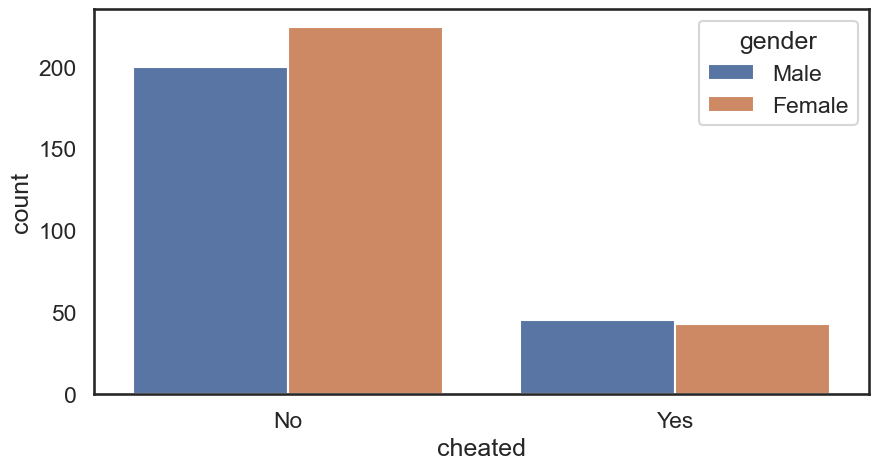

In [7]:
# Assign your plot to a variable named 'plot_cheated'
# YOUR CODE HERE
plot_cheated = sns.countplot(x='cheated', hue='gender', data=survey)

In [8]:
# TESTING CELL, PLEASE DO NOT EDIT

Okay, if you've generated a bar chart with `cheated` on the x-axis broken down by `gender`, you can see that more males said "Yes" and more females said "No"...but because we don't have the same counts in each group, we don't know how to really compare the two. Let's do the same now, but with proportions.

To do this, **create a DataFrame `prop_df` with three columns, one for gender, one for cheated, and one including the proportion of respondents who cheated within each gender.** This is going to take some `pandas` wrangling!

**Be sure to take a look at what's stored in `prop_df`.**

In [9]:
# YOUR CODE HERE
counts = survey.groupby(['gender','cheated']).size()

gender_totals= survey['gender'].value_counts()

proportions=counts/counts.groupby(level=0).transform('sum')

prop_df=proportions.reset_index(name='proportion')

In [10]:
assert prop_df.loc[0,"gender"] == "Female"
assert prop_df.shape == (4,3)

Now, you have the data you need. **Regenerate your barplot using the proportion data you just generated to determine which gender cheats more frequently.**


### Assign your seaborn plot to a variable named `plot_proportion`.

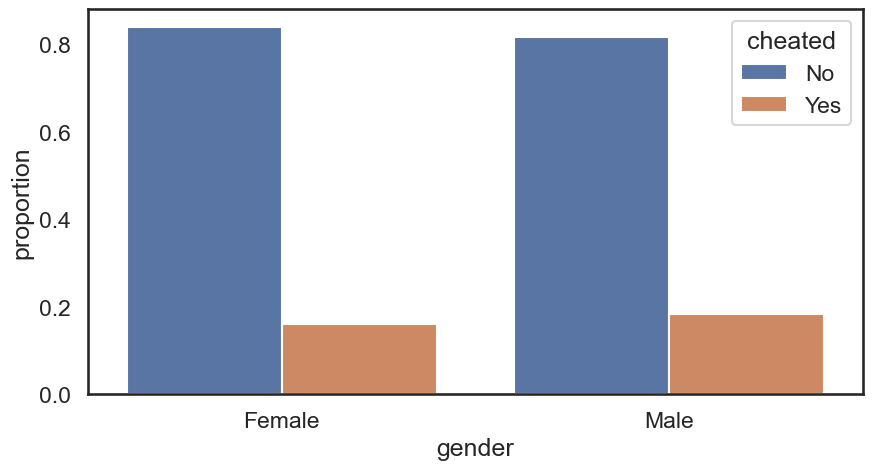

In [11]:
# Assign your seaborn plot to a variable named `plot_proportion`.
# YOUR CODE HERE
plot_proportion=sns.barplot(x='gender',y='proportion', hue='cheated',data=prop_df)

In [12]:
# TESTING CELL, PLEASE DO NOT EDIT

Thanks to some defaults in `seaborn`, the order of gender may be switched around, so females are listed first and are blue all of a sudden. If you didn't notice this, you could misinterpret the results from your analysis! **To avoid this, regenerate this plot using specifying that you want "Male" to be plotted before "Female", to be consistent with plot colors earlier.** (If your colors did not swap, go ahead and practice this anyway!)

### Assign your seaborn plot to a variable named `plot_reorder`.

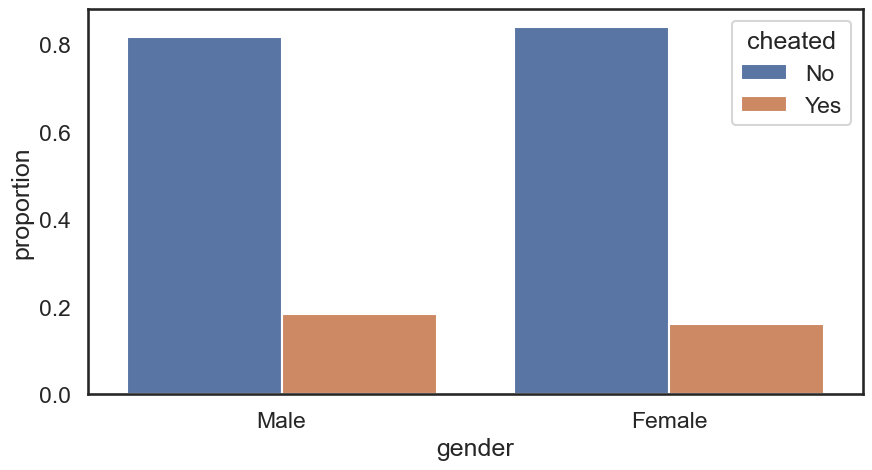

In [13]:
# Assign your seaborn plot to a variable named `plot_reorder`.
# YOUR CODE HERE
gender_order=['Male','Female']
plot_reorder=sns.barplot(x='gender',y='proportion',hue='cheated',data=prop_df,order=gender_order)

In [14]:
# TESTING CELL, PLEASE DO NOT EDIT

Great! Now we can answer our original question: Who cheats more on their significant other - males or females?
    
Include your answer in the cell below! 

According to this hypothetical situation, males do cheat more.

A quick reminder here that we are working with survey data, which people can lie on *and* only have information from 550 individuals who chose to respond to this survey. So, assuming people were honest (they aren't always on surveys!) it answers the question in this dataset, but we don't know if it generalizes more broadly.

# Part II : Risky Behavior

With Part I under our belts, let's answer the question: *Are cigarette smokers less likely to skydive?* The idea here is that skydiving and cigarette smoking are both considered risky behaviors, so we want to see if there's a relationship between the two.

Using similar approaches to what you did above, **generate a plot that answers the proposed question.** (Note that you'll likely want to use different colors for this plot than those used above, as to not have readers think the colors here represent the same categories!)

### Assign your seaborn plot to a variable named `plot_skydiving`.

In [15]:
#  Assign your seaborn plot to a variable named `plot_skydiving`.
# YOUR CODE HERE
prop_skysmoke= survey.groupby('smokes')['skydives'].mean().reset_index()
plot_skydiving = sns.barplot(x='smokes',y='skydives',data=prop_skysmoke)

KeyError: 'smokes'

In [16]:
# TESTING CELL, PLEASE DO NOT EDIT

Take a look at what you've generated. What's your conclusion? Is it what you expected? Does anything look weird? Did you change your colors so that they aren't the same as your above plot where blue and orange represented males and females? Include your interpretation and answer to the question below.

YOUR ANSWER HERE

# Part III : Gambling

Finally, let's answer the question: *Do people in New England gamble more than other parts of the country?* **Generate a plot that allows you to answer this question given the data you have in your dataset.** A reminder that you likely want to consider plot type, orientation, and colors when generating this figure.

### Assign your seaborn plot to a variable named `plot_gambling`.

In [17]:
# Assign your seaborn plot to a variable named `plot_gambling`.
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [18]:
# TESTING CELL, PLEASE DO NOT EDIT

Are all your labels visible? Did you consider the orientation of your plot? Also, are the colors different than above? What's the answer to our question? Include interpretation of this plot and answer to the question below:

YOUR ANSWER HERE

Feel free to explore additional variables in the data or customize the plots you've generated here to improve them. Feel free to share and discuss with your classmates!